**Problem Statement:**

In the real estate industry, determining the appropriate rental price for a property is crucial for property owners, tenants, and property management companies. Accurate rent predictions can help landlords set competitive prices, tenants make informed rental decisions, and property management companies optimize their portfolio management. The goal of this project is to develop a data-driven model that predicts the rental price of residential properties based on relevant features. By analyzing historical rental data and property attributes, the model aims to provide accurate and reliable rent predictions.

In [339]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
# Specify the path to your Excel file
file_path = '/content/House_Rent_Train.xlsx'

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
data.head()


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [341]:
pd.set_option('display.max_columns', 500)


In [342]:
data.head()


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


**Data Preprocessing**

In [343]:
data.shape

(20555, 25)

In [344]:
data.drop(columns = ['id'],inplace=True)


In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20528 non-null  object 
 1   locality         20395 non-null  object 
 2   activation_date  20532 non-null  object 
 3   latitude         20532 non-null  float64
 4   longitude        20532 non-null  float64
 5   lease_type       20532 non-null  object 
 6   gym              20555 non-null  int64  
 7   lift             20555 non-null  int64  
 8   swimming_pool    20555 non-null  int64  
 9   negotiable       20555 non-null  int64  
 10  furnishing       20555 non-null  object 
 11  parking          20555 non-null  object 
 12  property_size    20555 non-null  int64  
 13  property_age     20532 non-null  float64
 14  bathroom         20532 non-null  float64
 15  facing           20532 non-null  object 
 16  cup_board        20532 non-null  float64
 17  floor       

**need to change activation data object to dateandtime**

**bathroom float to int**

**cup_board float to int**

**floor float to int**

**total_floor float to int**

**amenities convert to right format**

**balconies float to int**


In [347]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
locality,0.778399
type,0.131355
balconies,0.111895
building_type,0.111895
water_supply,0.111895
amenities,0.111895
total_floor,0.111895
floor,0.111895
cup_board,0.111895
facing,0.111895


In [348]:
print(data.isnull().sum().sort_values(ascending=False))

locality           160
type                27
balconies           23
building_type       23
water_supply        23
amenities           23
total_floor         23
floor               23
cup_board           23
facing              23
bathroom            23
property_age        23
rent                23
lease_type          23
longitude           23
latitude            23
activation_date     23
parking              0
furnishing           0
negotiable           0
swimming_pool        0
lift                 0
gym                  0
property_size        0
dtype: int64


In [349]:
data.dropna(subset=['locality'], inplace=True)

In [350]:
data['type'].value_counts()

BHK2        11591
BHK3         4356
BHK1         3586
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [351]:
data['type'].fillna(data['type'].mode()[0], inplace = True)

In [352]:
# Assuming 'data' is the name of your DataFrame

# Mapping to consolidate similar categories
type_mapping = {
    'BHK2': 'BHK2',
    'bhk2': 'BHK2',
    'BHK3': 'BHK3',
    'bhk3': 'BHK3',
    'BHK1': 'BHK1',
    'RK1': 'RK1',
    'BHK4': 'BHK4',
    'BHK4PLUS': 'BHK4PLUS',
    '1BHK1': 'BHK1'
}

# Apply the mapping to the 'type' column
data['type'] = data['type'].map(type_mapping)

# Verify the changes
print(data['type'].value_counts())

BHK2        11625
BHK3         4368
BHK1         3590
RK1           550
BHK4          232
BHK4PLUS       30
Name: type, dtype: int64


In [353]:
data.isnull().sum().sort_values(ascending=False)

type               0
locality           0
balconies          0
building_type      0
water_supply       0
amenities          0
total_floor        0
floor              0
cup_board          0
facing             0
bathroom           0
property_age       0
property_size      0
parking            0
furnishing         0
negotiable         0
swimming_pool      0
lift               0
gym                0
lease_type         0
longitude          0
latitude           0
activation_date    0
rent               0
dtype: int64

In [354]:
## Convert 'activation' column to datetime
data['activation_date'] = pd.to_datetime(data['activation_date'])

In [355]:
data['activation_date'].dtype

dtype('<M8[ns]')

In [356]:
# Replace 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies' with the actual column names

data['bathroom'] = data['bathroom'].astype(int)
data['cup_board'] = data['cup_board'].astype(int)
data['floor'] = data['floor'].astype(int)
data['total_floor'] = data['total_floor'].astype(int)
data['balconies'] = data['balconies'].astype(int)
data['property_age'] = data['property_age'].astype(int)
data['rent'] = data['rent'].astype(int)

In [357]:
data['amenities'][3]

'{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}'

In [358]:
import json

# Assuming 'data' is the name of your DataFrame
data['amenities'] = data['amenities'].apply(json.loads)
data['true_amenities_count'] = data['amenities'].apply(lambda x: list(x.values()).count(True))

In [359]:
data.drop(columns = 'amenities', inplace = True)

In [360]:
data['locality'].value_counts()

Whitefield                                                                                        903
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                                    

In [ ]:
data['balconies'].value_counts()

1     7957
0     5871
2     4649
3     1582
4      288
5       40
6        4
10       3
13       1
Name: balconies, dtype: int64

In [ ]:
data['building_type'].value_counts()

IF    9194
AP    8808
IH    2376
GC      17
Name: building_type, dtype: int64

In [ ]:
data['water_supply'].value_counts()

CORP_BORE      10629
CORPORATION     6695
BOREWELL        3071
Name: water_supply, dtype: int64

In [ ]:
data['total_floor'].value_counts()

2     4835
4     4789
3     4642
1     2099
5     1480
0      360
14     239
6      211
12     209
9      206
10     195
11     195
8      180
13     170
7      167
15     124
19      69
16      64
18      52
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: total_floor, dtype: int64

In [ ]:
data.activation_date.value_counts()

2017-04-11 18:11:00    4
2018-01-27 12:06:00    3
2018-03-14 12:03:00    3
2018-10-06 21:26:00    3
2018-12-06 18:31:00    3
                      ..
2018-07-16 18:08:00    1
2018-10-04 09:29:00    1
2018-02-23 13:51:00    1
2017-02-10 14:07:00    1
2018-11-02 15:22:00    1
Name: activation_date, Length: 19435, dtype: int64

In [ ]:
data.latitude.value_counts()

12.939517    67
12.902062    46
12.969800    42
12.904365    27
12.966168    25
             ..
12.949237     1
12.903039     1
12.939441     1
12.900420     1
12.915114     1
Name: latitude, Length: 17628, dtype: int64

In [ ]:
data.longitude.value_counts()

77.730667    67
77.664076    46
77.749947    42
77.707085    27
77.724777    25
             ..
77.698189     1
77.700769     1
77.706519     1
77.730321     1
77.567166     1
Name: longitude, Length: 17620, dtype: int64

In [ ]:
data.lease_type.value_counts()

FAMILY      10119
ANYONE       9634
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [ ]:
data.lease_type.value_counts()

FAMILY      10119
ANYONE       9634
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [ ]:
data.gym.value_counts()

0    15773
1     4622
Name: gym, dtype: int64

In [ ]:
data.lift.value_counts()

0    13024
1     7371
Name: lift, dtype: int64

In [ ]:

data.swimming_pool.value_counts()

0    16834
1     3561
Name: swimming_pool, dtype: int64

In [ ]:
data.negotiable.value_counts()

1    14510
0     5885
Name: negotiable, dtype: int64

In [ ]:
data.furnishing.value_counts()

SEMI_FURNISHED     17805
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: furnishing, dtype: int64

In [ ]:
data.parking.value_counts()

BOTH            10747
TWO_WHEELER      7177
FOUR_WHEELER     1436
NONE             1035
Name: parking, dtype: int64

In [ ]:
data.property_size.value_counts()

1200    1768
600     1447
1000    1295
800     1082
1100     891
        ... 
1434       1
195        1
2807       1
1628       1
3040       1
Name: property_size, Length: 1136, dtype: int64

In [ ]:
data.property_age.value_counts()

 0      3312
 10     2853
 5      2743
 1      2107
 3      1890
 2      1321
 4       977
 8       948
 7       819
 15      772
 6       771
 20      413
 12      341
 9       325
 25      127
 13      101
 30      100
 11       99
 14       82
 18       59
 16       42
 17       42
-1        33
 40       17
 22       14
 50       12
 19       11
 21       11
 35        9
 23        8
 27        6
 34        5
 45        4
 24        4
 28        3
 26        3
 33        3
 100       2
 37        1
 42        1
 60        1
 80        1
 49        1
 400       1
Name: property_age, dtype: int64

In [ ]:
data.bathroom.value_counts()

2     11220
1      6222
3      2630
4       285
5        33
6         3
21        1
7         1
Name: bathroom, dtype: int64

In [ ]:
data.facing.value_counts()

E     9469
N     5891
W     2613
S     1211
NE     810
SE     193
NW     149
SW      59
Name: facing, dtype: int64

In [ ]:
data.cup_board.value_counts()

2        8525
3        3771
1        3721
0        1866
4        1309
5         443
6         421
8         114
7          77
10         75
9          36
12         17
15          6
11          5
20          4
16          2
13          1
40          1
48026       1
Name: cup_board, dtype: int64

In [ ]:
data.floor.value_counts()

1     5854
0     4964
2     4514
3     2567
4     1182
5      292
6      204
7      187
9      130
8      119
10     100
11      86
12      57
14      44
13      31
15      23
16      16
17       9
19       6
18       5
20       3
25       1
22       1
Name: floor, dtype: int64

In [ ]:

data.total_floor.value_counts()

2     4835
4     4789
3     4642
1     2099
5     1480
0      360
14     239
6      211
12     209
9      206
10     195
11     195
8      180
13     170
7      167
15     124
19      69
16      64
18      52
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: total_floor, dtype: int64

In [ ]:
data.water_supply.value_counts()

CORP_BORE      10629
CORPORATION     6695
BOREWELL        3071
Name: water_supply, dtype: int64

In [ ]:
data.building_type.value_counts()

IF    9194
AP    8808
IH    2376
GC      17
Name: building_type, dtype: int64

In [ ]:
data.balconies.value_counts()

1     7957
0     5871
2     4649
3     1582
4      288
5       40
6        4
10       3
13       1
Name: balconies, dtype: int64

In [ ]:
data.rent.value_counts()

15000    1334
20000    1327
25000    1088
12000    1037
18000    1001
         ... 
19700       1
17300       1
18350       1
12200       1
23150       1
Name: rent, Length: 206, dtype: int64

In [ ]:
data.true_amenities_count.value_counts()

3     3487
1     3283
2     2268
4     2118
0     1189
5     1108
6      861
7      773
8      708
9      642
10     601
11     595
15     502
13     491
12     486
14     468
16     372
17     240
18     124
19      79
Name: true_amenities_count, dtype: int64

**OUTLIER**

In [ ]:
data.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,true_amenities_count
count,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000
mean,12.945744,77.637259,0.226624,0.361412,0.174602,0.711449,1061.802942,5.774749,1.858446,4.566119,1.870066,3.798431,1.148321,19054.638147,5.242854
std,0.029590,0.110737,0.418658,0.480421,0.379635,0.453100,591.730876,6.360262,0.711163,336.278556,2.180868,3.182528,0.993218,8433.748929,4.612726
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000
25%,12.918211,77.571944,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,2.000000
50%,12.943787,77.633393,0.000000,0.000000,0.000000,1.000000,1046.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,3.000000
75%,12.970924,77.695704,0.000000,1.000000,0.000000,1.000000,1284.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000,19.000000


In [ ]:
import pandas as pd

# Assuming 'activation_date' is the name of your column with activation dates
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Extracting month and day
data['activation_month'] = data['activation_date'].dt.month
data['activation_day'] = data['activation_date'].dt.day

# Display the updated DataFrame
print(data[['activation_date', 'activation_month', 'activation_day']])

          activation_date  activation_month  activation_day
1     2017-09-10 12:48:00                 9              10
2     2018-12-06 22:02:00                12               6
3     2018-07-20 16:22:00                 7              20
4     2018-05-31 17:41:00                 5              31
5     2017-10-24 18:29:00                10              24
...                   ...               ...             ...
20527 2017-12-13 18:08:00                12              13
20528 2017-10-19 20:31:00                10              19
20529 2017-12-21 21:18:00                12              21
20530 2018-06-28 21:58:00                 6              28
20531 2018-08-07 22:31:00                 8               7

[20395 rows x 3 columns]


In [ ]:
data.drop(columns=['activation_date', 'activation_day'], inplace=True)

In [310]:
data.drop(columns=['latitude', 'longitude'], inplace=True)

In [ ]:
data

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count,activation_month
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8,9
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6,12
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0,7
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3,5
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0,2,E,1,3,5,CORP_BORE,AP,2,18000,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,"Gattigere,RR Nagar",12.925380,77.524397,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10,12
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4,10
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8,12
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10,6


In [ ]:
integer_data_cols = [var for var in data.columns if data[var].dtype == 'int64']
integer_data_cols

['gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'property_size',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent',
 'true_amenities_count',
 'activation_month']

In [ ]:
for i in integer_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "gym" is divided into "2" categories.
Column "lift" is divided into "2" categories.
Column "swimming_pool" is divided into "2" categories.
Column "negotiable" is divided into "2" categories.
Column "property_size" is divided into "1136" categories.
Column "property_age" is divided into "44" categories.
Column "bathroom" is divided into "8" categories.
Column "cup_board" is divided into "19" categories.
Column "floor" is divided into "23" categories.
Column "total_floor" is divided into "27" categories.
Column "balconies" is divided into "9" categories.
Column "rent" is divided into "206" categories.
Column "true_amenities_count" is divided into "20" categories.
Column "activation_month" is divided into "12" categories.


In [ ]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "type" is divided into "6" categories.
Column "locality" is divided into "1917" categories.
Column "lease_type" is divided into "4" categories.
Column "furnishing" is divided into "3" categories.
Column "parking" is divided into "4" categories.
Column "facing" is divided into "8" categories.
Column "water_supply" is divided into "3" categories.
Column "building_type" is divided into "4" categories.


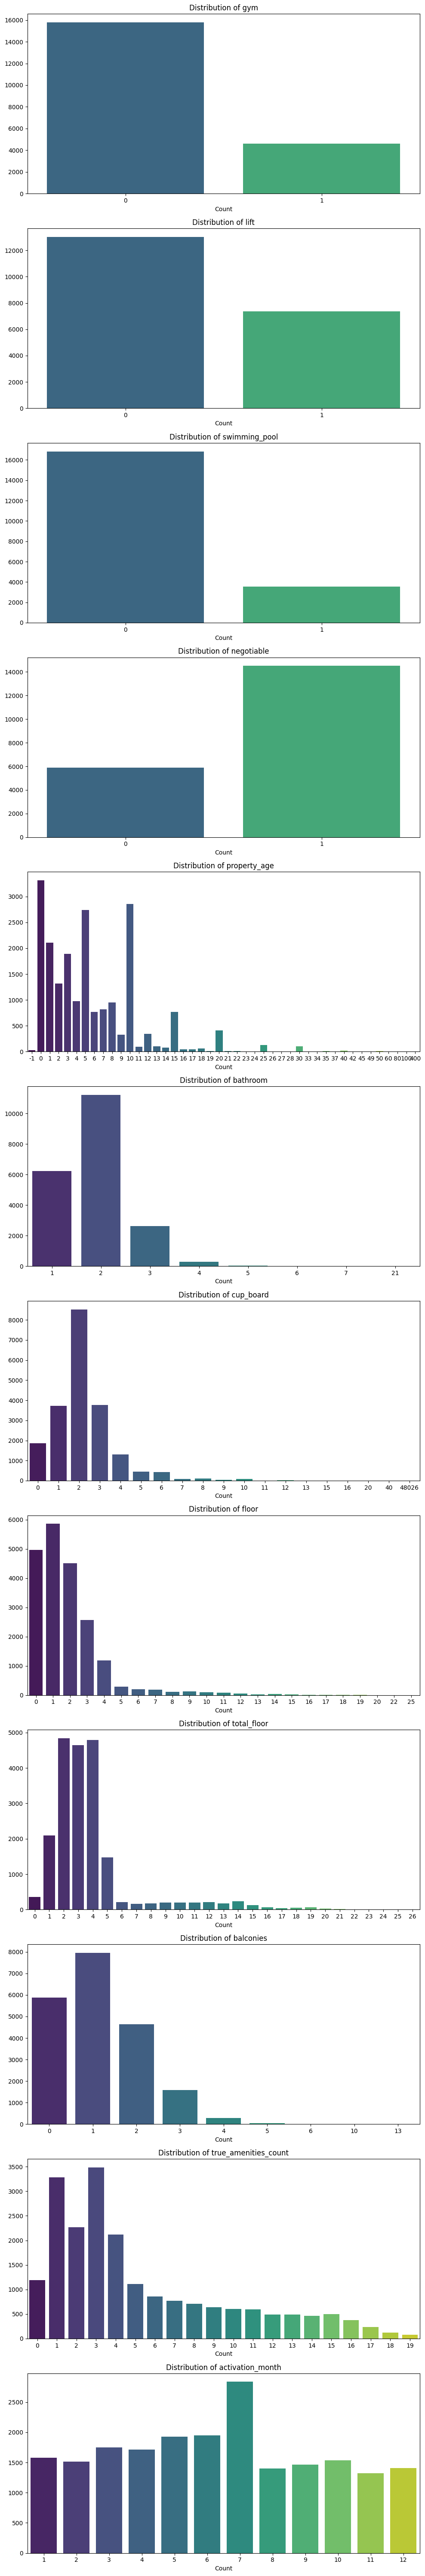

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age', 'bathroom', 'cup_board',
                   'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

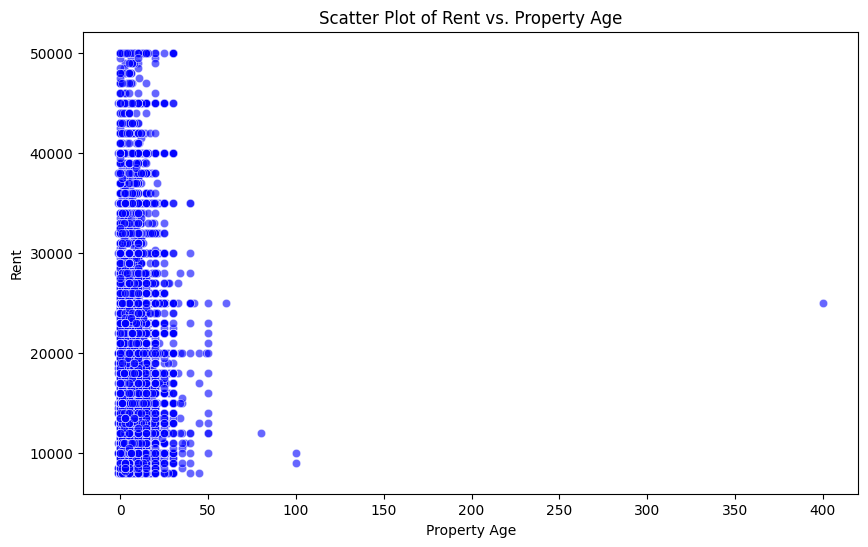

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='property_age', y='rent', data=data, alpha=0.6, color='blue')

# Set plot labels
plt.title('Scatter Plot of Rent vs. Property Age')
plt.xlabel('Property Age')
plt.ylabel('Rent')

plt.show()

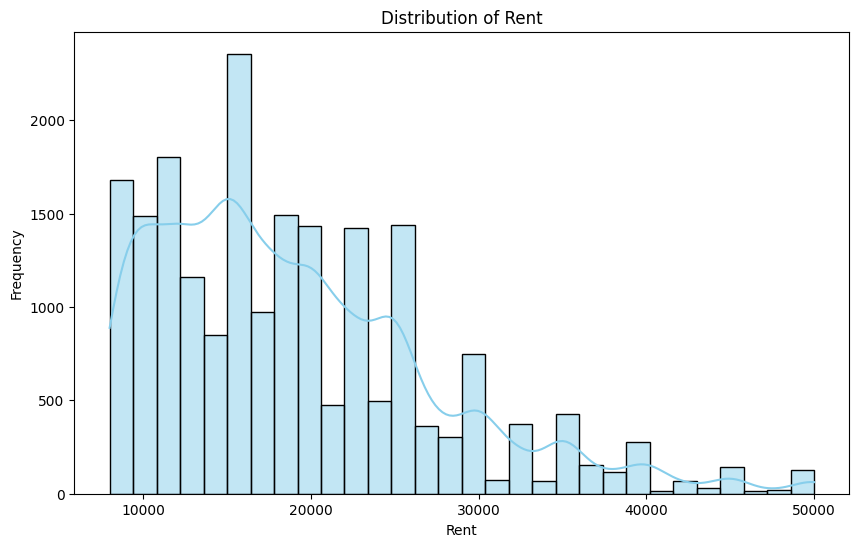

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['rent'], bins=30, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('Rent')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rent')

plt.show()

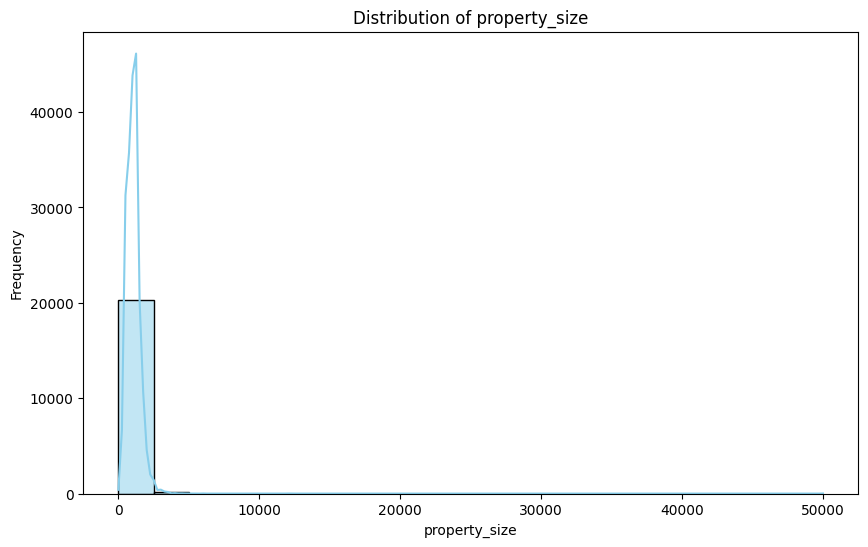

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['property_size'], bins=20, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('property_size')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of property_size')

plt.show()


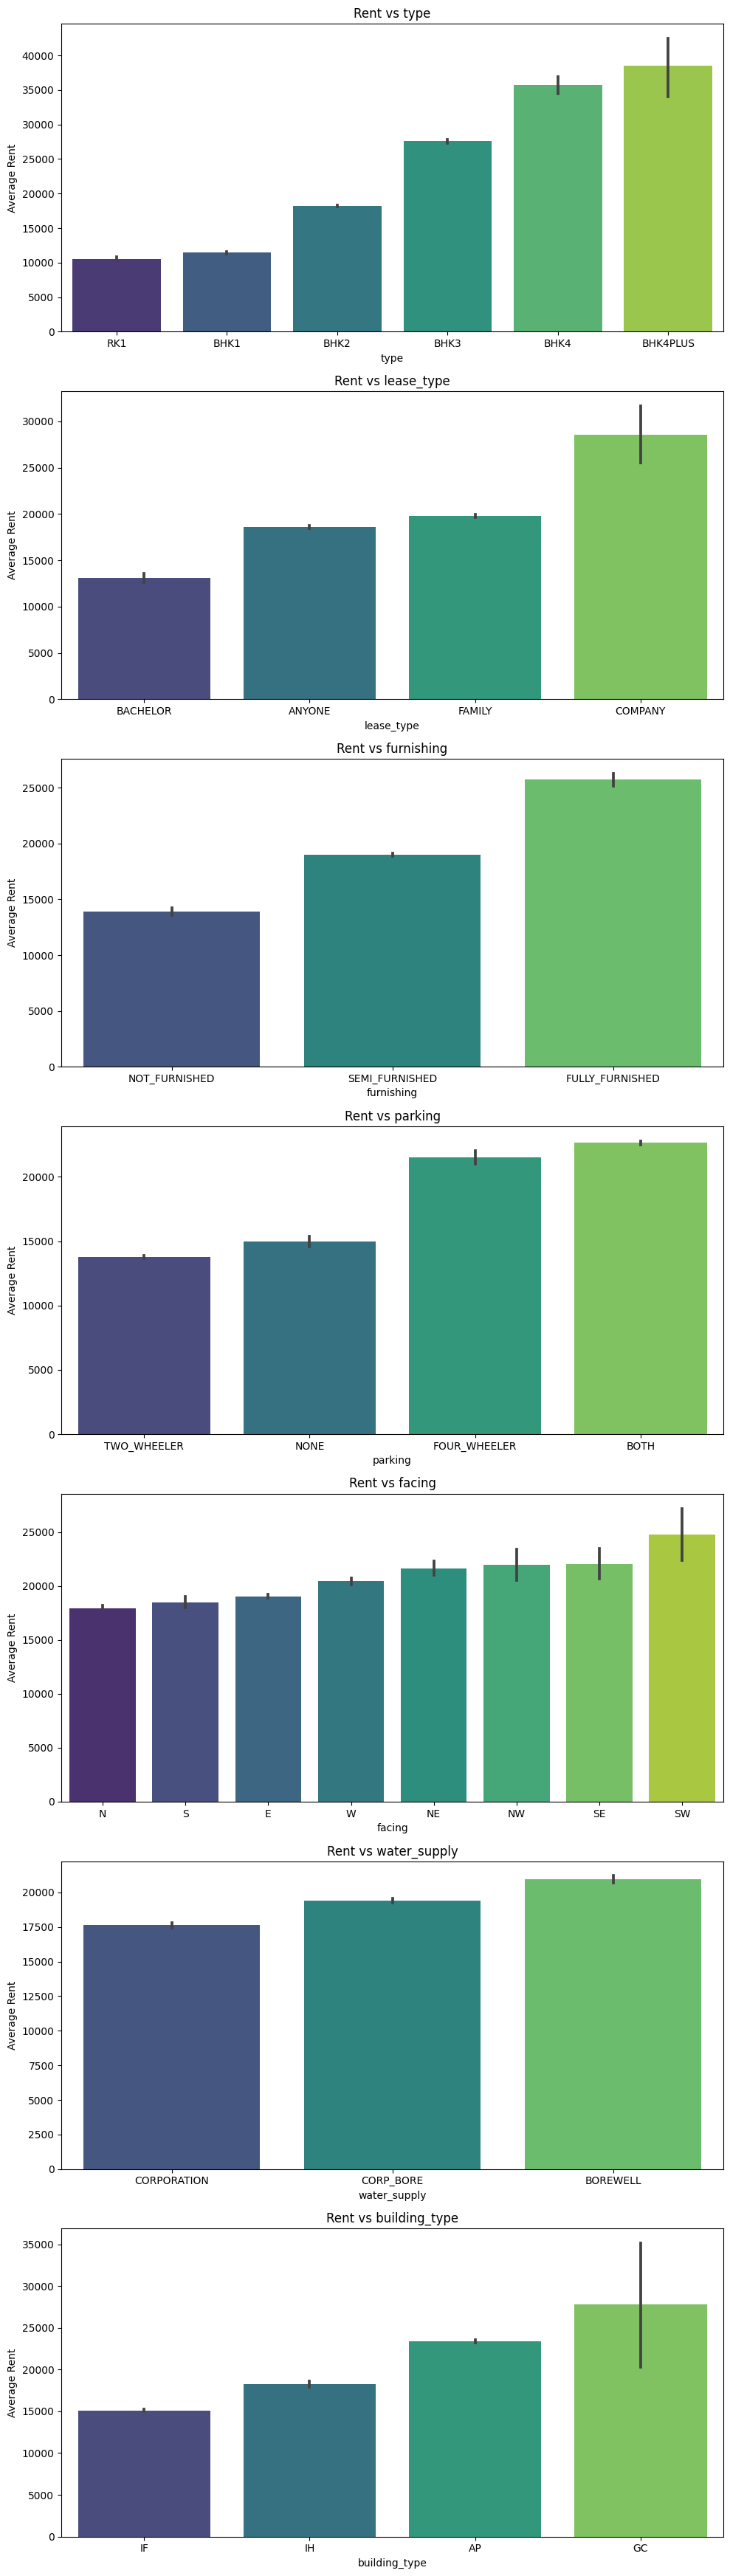

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of categorical columns
categorical_columns = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Loop through categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    # Calculate average rent for each category and sort by rent
    average_rent_by_category = data.groupby(column)['rent'].mean().sort_values()

    sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()

<ipython-input-172-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-172-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-172-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-172-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-172-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

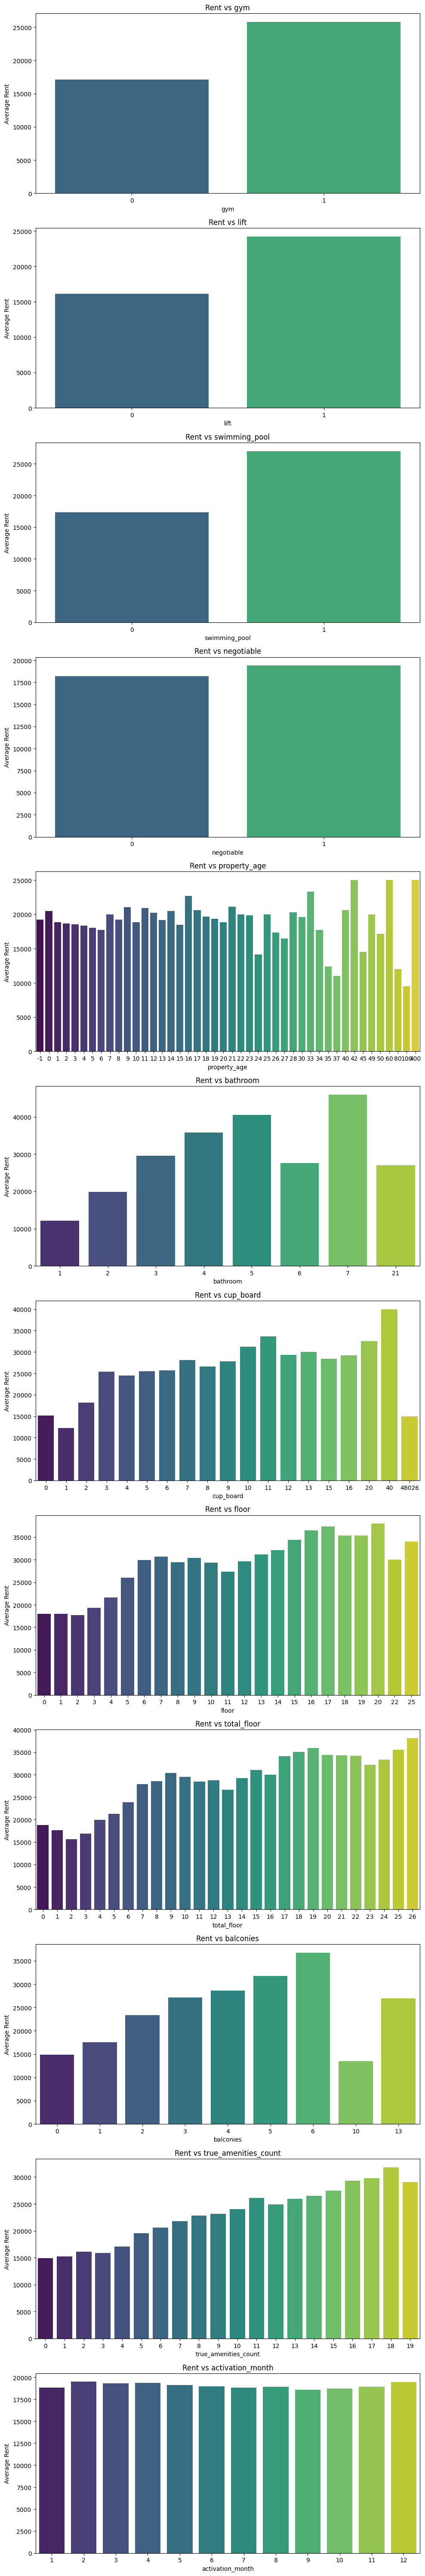

In [ ]:
# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age',
                   'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()

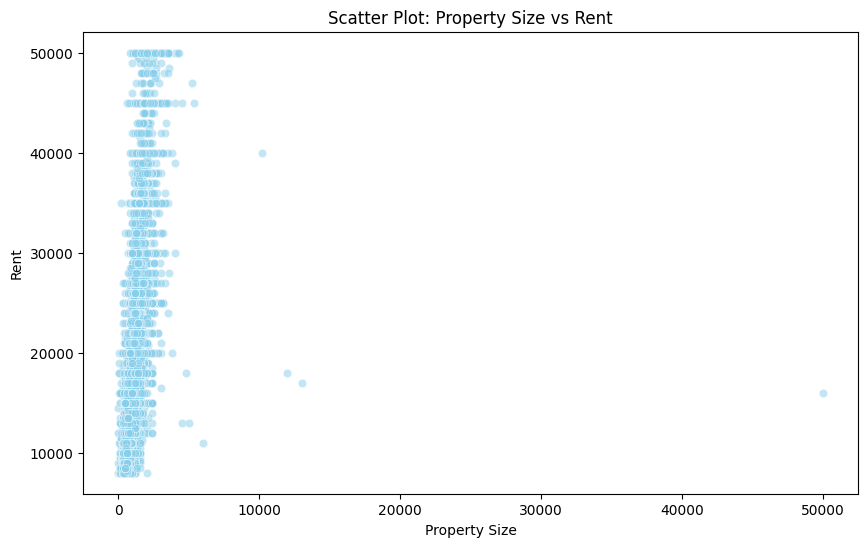

In [ ]:
# Assuming 'data' is the name of your DataFrame

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot for 'property_size' vs 'rent'
sns.scatterplot(x='property_size', y='rent', data=data, alpha=0.5, color='skyblue')

# Adding labels and title
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.title('Scatter Plot: Property Size vs Rent')

plt.show()

<ipython-input-174-c7462e52d902>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')


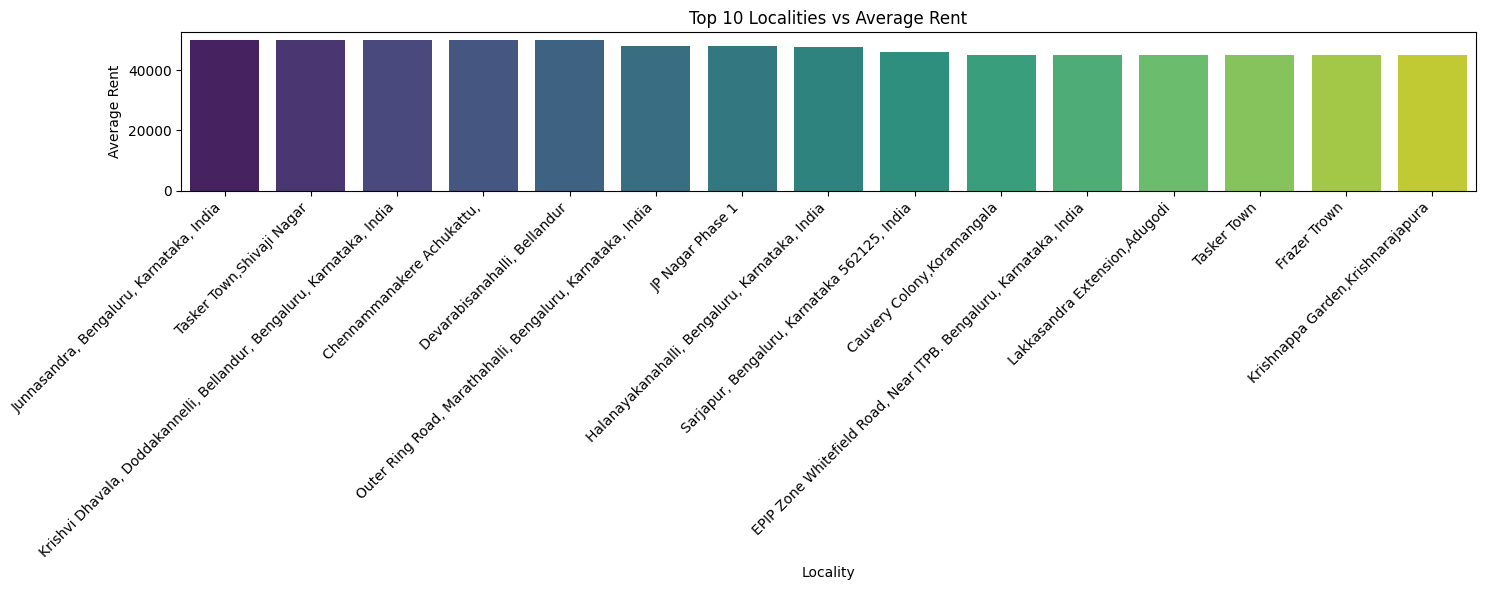

In [ ]:

# Calculate the average rent for each locality and sort by rent
average_rent_by_locality = data.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Select the top 10 localities
top_localities = average_rent_by_locality.head(15).index

# Filter the data for the top localities
data_top_localities = data[data['locality'].isin(top_localities)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bar plot for 'locality' vs 'rent'
sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')

# Adding labels and title
ax.set_xlabel('Locality')
ax.set_ylabel('Average Rent')
ax.set_title('Top 10 Localities vs Average Rent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-175-c2b8fd224a66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


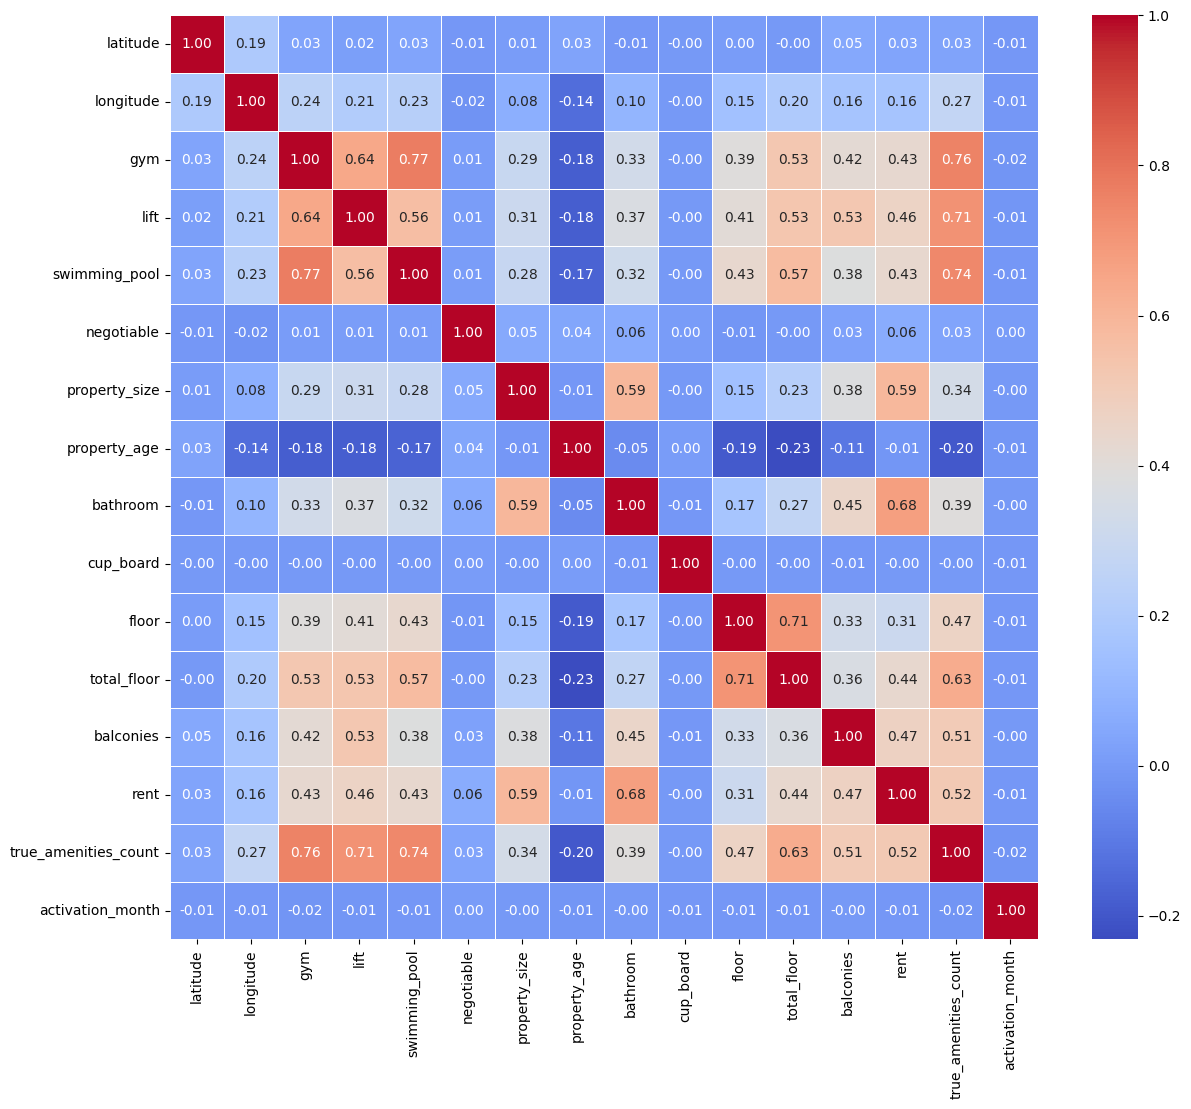

In [ ]:
# Create a correlation matrix (replace 'data' with your DataFrame)
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


**Encoding Categorical Variables**

In [ ]:
data

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count,activation_month
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8,9
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6,12
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0,7
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3,5
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0,2,E,1,3,5,CORP_BORE,AP,2,18000,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,"Gattigere,RR Nagar",12.925380,77.524397,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10,12
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4,10
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8,12
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10,6


In [ ]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
data['type'] = data['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
data['lease_type'] = data['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
data['furnishing'] = data['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
data['parking'] = data['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
data['facing'] = data['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
data['water_supply'] = data['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
data['building_type'] = data['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [ ]:
pip install category_encoders

In [ ]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
data = looe_encoder.fit_transform(data, data['rent'])

In [ ]:
data

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count,activation_month
1,2,26540.972222,12.929557,77.672280,1,0,1,0,1,1,3,1400,4,2,4,2,3,4,0,2,2,22000,8,9
2,3,19054.638147,12.982870,80.262012,2,0,1,0,0,1,3,1350,6,3,2,3,1,5,1,2,3,28000,6,12
3,1,15572.916667,12.955991,77.531634,2,0,0,0,1,1,0,600,3,1,2,1,1,2,0,1,0,8000,0,7
4,3,20157.608696,12.963903,77.649446,2,0,0,0,1,1,3,1500,15,3,2,4,0,0,0,1,1,45000,3,5
5,1,28825.595238,12.986196,77.718314,2,1,1,1,1,1,3,1080,0,2,2,1,3,5,1,2,2,18000,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,2,19125.000000,12.925380,77.524397,1,1,1,1,1,1,3,1650,1,3,2,3,4,4,2,2,2,25000,10,12
20528,2,20957.142857,12.931072,77.632361,1,0,0,0,1,1,3,1000,10,2,0,2,1,2,0,1,2,30000,4,10
20529,2,13625.582938,12.901800,77.566597,2,1,1,0,1,1,3,1000,0,2,3,2,5,5,2,2,2,16000,8,12
20530,2,22152.575107,12.965502,77.647694,2,0,1,0,0,1,3,1000,5,2,2,2,2,4,1,2,3,30000,10,6


**SPLIT THE DATA**

In [ ]:
X = data.drop('rent',axis=1)
y = data['rent']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [ ]:

print(len(y_train))
print(len(y_test))


16316
4079


**SCALE THE DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.32167451,  0.67644989, -0.88404296, ..., -0.15161823,
          0.16449427,  0.20861098],
        [-1.35331666,  0.82035204,  0.49582473, ..., -1.16298498,
         -0.48709313, -1.02093721],
        [-0.01582107, -0.57191878,  0.85668519, ..., -0.15161823,
         -0.48709313, -0.71355016],
        ...,
        [-0.01582107,  0.2980252 , -0.89572102, ..., -0.15161823,
         -0.48709313, -0.71355016],
        [-0.01582107, -1.28857487, -1.01321977, ..., -0.15161823,
         -0.26989733,  0.20861098],
        [ 1.32167451, -0.09711351,  0.92529004, ...,  1.87111527,
          1.03327748,  0.20861098]]),
 array([[ 1.32167451e+00,  4.16052714e-01,  1.27366719e+00, ...,
          8.59748520e-01,  1.64494271e-01, -4.06163115e-01],
        [-1.58210743e-02, -4.45704620e-03,  1.15717018e+00, ...,
         -1.16298498e+00, -9.21484738e-01,  2.08610983e-01],
        [-1.35331666e+00, -3.49643395e-02,  1.11515804e+00, ...,
         -1.16298498e+00, -1.13868054e+00, -7.13550164e-

**MODEL FITING**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)


[26837.03821589 16277.58552647 10431.59504154 ... 18312.32731371
 24922.1025718  21735.98855704]
3035     20000
7173     12000
953       8000
12980    40000
16243    35000
         ...  
734      10000
9257     12000
17018    17000
3802     20000
8491     24000
Name: rent, Length: 4079, dtype: int64


In [ ]:
linear_model.score(X_test, y_test)

0.4500530921754822

In [ ]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

-172.83560621614942

**Decision Tree Regression**

In [ ]:
#Choosing the best of depth Value
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())


Depth :  1  train Score  :  0.3882487349764173 cross_val_score :  0.3876581348706935
Depth :  2  train Score  :  0.5473735095565788 cross_val_score :  0.5464048291273509
Depth :  3  train Score  :  0.6087630223559546 cross_val_score :  0.6037120012396262
Depth :  4  train Score  :  0.6526655344334913 cross_val_score :  0.6447536890677189
Depth :  5  train Score  :  0.685787066632016 cross_val_score :  0.6751078723782651
Depth :  6  train Score  :  0.7138250296046993 cross_val_score :  0.6867978304638702
Depth :  7  train Score  :  0.7423238027454864 cross_val_score :  0.697457866812643
Depth :  8  train Score  :  0.7733917759101746 cross_val_score :  0.706514876105454
Depth :  9  train Score  :  0.804897001992237 cross_val_score :  0.7083194993073768
Depth :  10  train Score  :  0.8375026969170654 cross_val_score :  0.7020208673915105
Depth :  11  train Score  :  0.8655325528418515 cross_val_score :  0.6910195738193025
Depth :  12  train Score  :  0.8910060118722141 cross_val_score :  

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)

In [ ]:

print("The best depth is 6 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 6 and Cross_val_score is: 0.7083194993073768


In [ ]:

# Implementing Decision Tree Regression
dt_regressor=DecisionTreeRegressor(max_depth=6, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.6867978304638702

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
11,0.804584,property_size
1,0.069682,locality
3,0.054175,longitude
13,0.034440,bathroom
0,0.016996,type
17,0.007340,total_floor
2,0.003388,latitude
6,0.002983,lift
9,0.002533,furnishing
10,0.001874,parking


**Random Forest Regression**

In [ ]:

#Choosing the best depth value
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.571268705394857
Depth :  4 cross_val_score :  0.6798901450200053
Depth :  8 cross_val_score :  0.7690756729610416
Depth :  10 cross_val_score :  0.7915788375366215
Depth :  11 cross_val_score :  0.7988608774038738
Depth :  12 cross_val_score :  0.8046193722757515
Depth :  13 cross_val_score :  0.8084666835169488
Depth :  15 cross_val_score :  0.8139957994551512
Depth :  18 cross_val_score :  0.8173000576740177
Depth :  20 cross_val_score :  0.8181007242327033


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.8181007242327033


In [ ]:
#Implementing Random Forest Regression

rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

**Extreme Gradient Boosting Regression**

In [199]:
#Choosing the best Learning Rate
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6369298392775967
Learning rate :  0.05 cross_val_score: 0.8110892594754694
Learning rate :  0.08 cross_val_score: 0.8204635533694927
Learning rate :  0.1 cross_val_score: 0.8233336742996805
Learning rate :  0.2 cross_val_score: 0.8302882058523794


In [200]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [201]:
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.2 and Cross_val_score is: 0.8302882058523794


In [202]:
#Implementing Extreme Gradient Boosting Regression

xgb_regressor= xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [203]:

cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.8302882058523794

In [207]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
#print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: -172.83560621614942
Cross Validation Score for Decision Tree Regression Model:  0.6867978304638702
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.8302882058523794


**R2 Score for Machine-Learning Models**

In [208]:
from sklearn.metrics import r2_score

In [212]:
y_pred_lr=linear_model.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [213]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [214]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.4500530921754822
R2 Score for Decision Tree Regression Model:  0.7012898761558114
R2 Score for Random Forest Regression Model:  0.8315588907523935
R2 Score for Extreme-Gradient Boosting Regression Model:  0.8385163346646055


In [215]:
xgb_regressor.feature_importances_

array([0.05479302, 0.02875485, 0.01633379, 0.04805594, 0.01496141,
       0.00512315, 0.06370017, 0.02736193, 0.007174  , 0.05574743,
       0.03772947, 0.38769832, 0.00895145, 0.10091502, 0.00686881,
       0.02512447, 0.00696786, 0.03577723, 0.00610577, 0.03515292,
       0.00876114, 0.01259389, 0.00534795], dtype=float32)

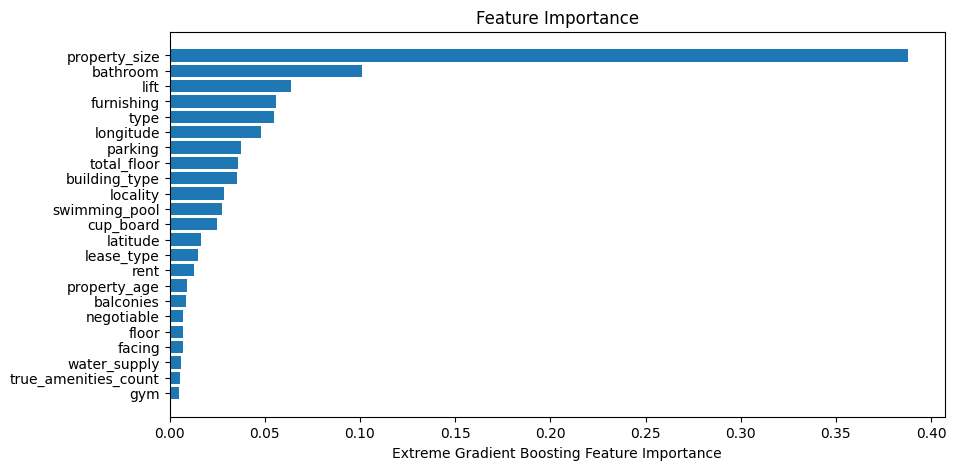

In [216]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

**Evaluate Your System on the Test Set**

In [311]:
test = pd.read_excel('/content/House_Rent_Test.xlsx')

In [312]:
test.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1300,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,500,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1400,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [313]:
test.shape

(4500, 24)

In [314]:
test.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [294]:
test.isnull().sum()


id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [295]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [296]:
test.drop(columns = ['id'],inplace=True)

In [297]:
test['activation_date'] = pd.to_datetime(test['activation_date'])

In [298]:
test['bathroom'] = test['bathroom'].astype(int)
test['cup_board'] = test['cup_board'].astype(int)
test['floor'] = test['floor'].astype(int)
test['total_floor'] = test['total_floor'].astype(int)
test['balconies'] = test['balconies'].astype(int)
test['property_age'] = test['property_age'].astype(int)
#test['rent'] = test['rent'].astype(int)

In [299]:
import json

# Assuming 'data' is the name of your DataFrame
test['amenities'] = test['amenities'].apply(json.loads)
test['true_amenities_count'] = test['amenities'].apply(lambda x: list(x.values()).count(True))

In [315]:
test.drop(columns = 'amenities', inplace = True)

In [316]:
test.drop(columns=['activation_date', 'latitude', 'longitude'], inplace=True)

In [317]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
test['type'] = test['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
test['lease_type'] = test['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
test['furnishing'] = test['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
test['parking'] = test['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
test['facing'] = test['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
test['water_supply'] = test['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
test['building_type'] = test['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [318]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
test = looe_encoder.fit_transform(test, test['property_size'])

In [319]:
test

,id,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,2,973.173077,2,0,1,0,0,1,3,1300,1,2,0,2,3,3,1,2,1
1,ff80818157288e9301572c05651853a6,2,792.159091,1,0,0,0,1,1,0,600,7,1,1,2,0,3,0,0,0
2,ff8081815f1afc58015f1b831fde166e,1,691.777778,1,0,0,0,1,1,0,600,10,1,1,1,0,1,0,0,0
3,ff8081816035b31901603f7922c046e0,1,1072.577778,1,0,0,0,0,0,0,500,8,1,2,0,2,2,1,0,0
4,ff8081815c3582f5015c38fc31aa73a4,3,1522.514286,1,1,1,1,1,1,3,1400,0,3,2,3,3,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,2,700.000000,2,0,0,0,1,1,3,950,2,2,0,2,3,3,1,0,2
4496,ff8081816098166901609bf52bb702a8,2,695.000000,1,0,0,0,1,1,0,750,10,1,0,2,2,3,0,0,1
4497,ff808181629ac9860162a7ac1a4253bb,1,1072.577778,1,0,0,0,1,1,1,500,10,1,3,1,2,3,1,1,0
4498,ff8081815b57c717015b580af22f1bbd,3,1475.000000,2,1,1,1,1,1,3,1450,1,3,0,4,10,10,2,2,3


In [330]:
data.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [331]:
test.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [327]:
data.drop(columns = 'true_amenities_count', inplace = True)

In [328]:
data.drop(columns = 'activation_month', inplace = True)

In [329]:
test.drop(columns = 'id', inplace = True)

In [332]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)
